In [2]:
#buildinga simple trading strategy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#import Microsoft's stock data, add two columns - MA10 and MA50
ms = pd.read_csv(r'C:\Users\ckraft\Desktop\My Experiments\Personal Use\MSFT.csv')
ms['MA10'] = ms['Close'].rolling(10).mean() #10 days moving avg
ms['MA50'] = ms['Close'].rolling(50).mean() #50 days moving avg
#ms = ms.dropna()
ms.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
0,2020-12-15,215.169998,215.419998,212.240005,214.130005,212.350037,27000600,NaN,NaN
1,2020-12-16,214.750000,220.110001,214.720001,219.279999,217.457199,35023300,NaN,NaN
2,2020-12-17,219.869995,220.889999,217.919998,219.419998,217.596054,32515800,NaN,NaN
3,2020-12-18,218.589996,219.690002,216.020004,218.589996,216.772934,63354900,NaN,NaN
4,2020-12-21,217.550003,224.000000,217.279999,222.589996,220.739685,37181900,NaN,NaN


In [10]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

ms['Shares'] = [1 if ms.loc[ei, 'MA10']>ms.loc[ei, 'MA50'] else 0 for ei in ms.index]

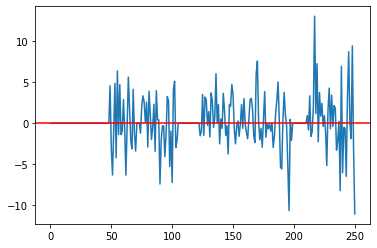

In [11]:
#Add a new column "Profit" using List Comprehension, for any rows in ms, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [12]:
#Use .cumsum() to calculate the accumulated wealth over the period

ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
247,2021-12-08,335.309998,335.500000,330.799988,334.970001,334.970001,24761000,331.347000,319.4452,1,333.100006,-1.869995,41.319991
248,2021-12-09,334.410004,336.489990,332.119995,333.100006,333.100006,22214200,330.866000,320.4272,1,342.540009,9.440003,50.759994
249,2021-12-10,334.980011,343.000000,334.790009,342.540009,342.540009,38077300,332.152002,321.6396,1,339.399994,-3.140015,47.619979
250,2021-12-13,340.679993,343.790009,339.079987,339.399994,339.399994,28899400,332.429001,322.6456,1,328.339996,-11.059998,36.559981
251,2021-12-14,333.220001,334.640015,324.109985,328.339996,328.339996,44407300,332.204001,323.5502,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 36.559980999999965')

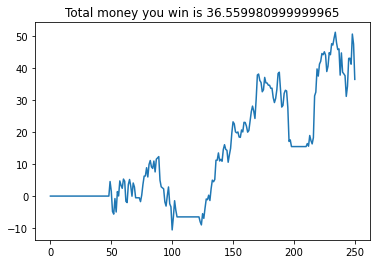

In [13]:
#plot the wealth to show the growth of profit over the period

ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))